# Report

## Task 1

We have two populations Blue (privileged) and Red (unprivileged), with the Blue population being 9 times larger than the Red population.

Individuals from both populations are requesting to attend XAI training to improve competency in this important area. Number of places is limited. The administrators of the training have decided to give priority to enrolling individuals who may need this training in the future, although unfortunately it is difficult to predict who will benefit.

The decision rule adopted:
1. In the Red group, half of the people will find the skills useful in future and half will not. Administrators randomly allocate 50% of people to training.
2. in the Blue group, 80% of people will find the training useful in future and 20% will not, although of course it is not known who will find it useful. The administrators have built a predictive model based on user behaviour in predicting for whom it will be useful and whom will not. The model has the following performance:


| Blue                     	| Will use XAI 	| Will not use XAI 	| Total 	|
|--------------------------	|--------------	|------------------	|-------	|
| Enrolled in training     	| 60           	| 5               	| 65    	|
| not enrolled in training 	| 20            	| 15               	| 35    	|
| Total                    	| 80           	| 20               	| 100   	|


Task: Calculate the Demographic parity, equal opportunity and predictive rate parity coefficients for this decision rule.

Starred task: How can this decision rule be changed to improve its fairness?

## Solution

What do we know?
- populations: R, B=9R
- B: privileged, R: unprivileged
- $\frac{1}{2}R$ will be trained, $\frac{1}{2}R$ will use the skills in the future
- $\frac{4}{5}$ will find use the skills
- Confusion matrix for B


Based on that, we can calculate following fairness metrics:
- Demographic parity:

The condition for demographic parity is, for all $a,b \in A$

$$P(C=1|A=a)=P(C=1|A=b).$$

Legally, disparate impact is a once-side reformulation of this condition, where 80% disparity is an agreed upon tolerance decided in the legal arena:

$$\frac{P(C=1|A=a)}{P(C=1|A=b)} < 0.8$$

In our case we have:



$$\frac{P(Y^{*}|A = \text{Blue})}{P(Y^{*}|A=\text{Red})} = 0.65 \cdot 2 = 1.3$$

- Equal opportunity:

The condition for True Positive parity is, for all $a,b \in A$

$$P(C=1|Y=1,A=a)=P(C=1|Y=1,A=b).$$

In our case

$$\frac{P(Y^{*}| A=\text{Blue}, Y=1)}{P(Y^{*}| A=\text{Red}, Y=1)} = \frac{3}{4} \cdot 2 = 1.5$$

- Predictive parity rate:

The condition for PPV-parity is, for all $a,b \in A$

$$P(Y=1|C=1,A=a)=P(Y=1|C=1,A=b)$$

And in our case:

$$\frac{P(Y|A=\text{Blue}, Y^{*}=1)}{P(Y|A=\text{Red}, Y^{*}=1)}= \frac{120}{65}$$

## Task 2

1. Train a model for the selected dataset.
2. For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity.
3. Train another model (different hyperparameters, feature transformations etc.) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it.
4. Apply the selected bias mitigation technique on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this correction.
5. Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation?
6. ! COMMENT on the results obtained in (2)-(5)



## Solution

For this homework, I've selected adult income dataset from kaggle ([Source](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)). It consists of 14 features (description below) and two classes: income below and abowe 50K for a year.

| Feature                     	| Information |
|--------------------------	|--------------	|
| age    	| continuous           	| 
| workclass | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked|
|fnlwgt|continuous|
|education|Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool|
|education-num | continuous|
|marital-status| Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|
|occupation| Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
|relationship|Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried|
|race| White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|
|sex|Female, Male|
|capital-gain|continuous|
|capital-loss|continuous|
|hours-per-week|continuous|
|native-country|United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|

I've made little data exploration. Below there are histograms of all data. 


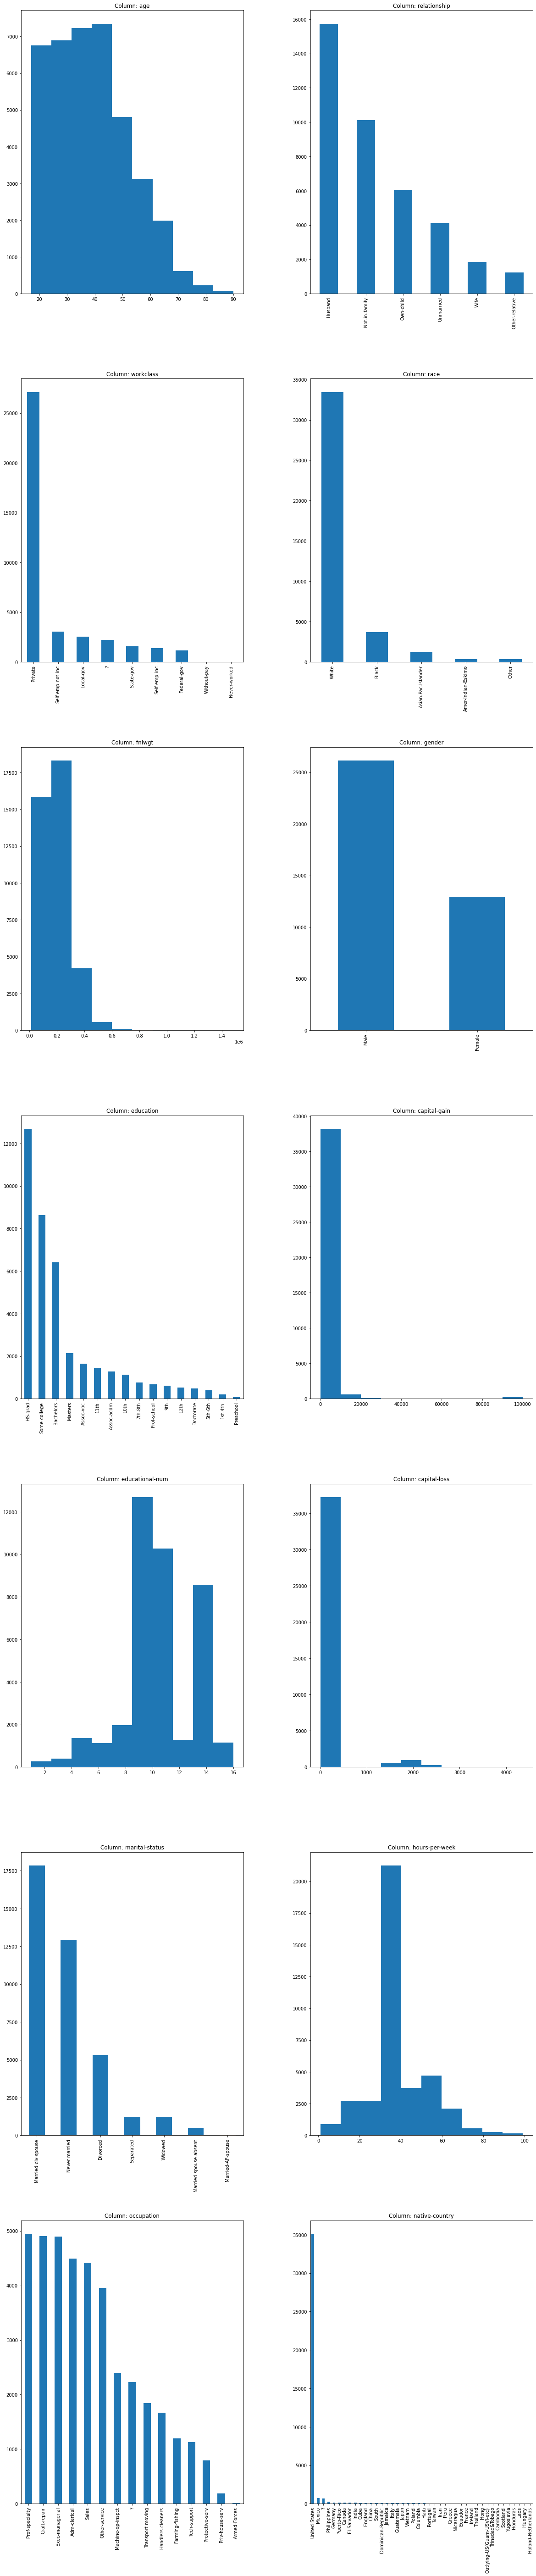

And correlogram of continuous data:  

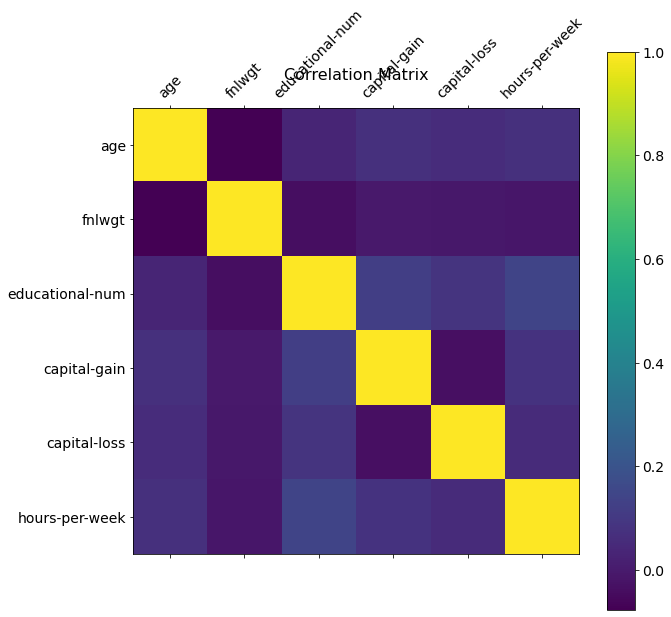

The data is not very correlated, but there are huge disproportions in the distributions of some features. The majority of people comes from the US. There are more males and white people, most of them works in private sector. Also there are more young people in the dataset. 

With this information we can make further analyses. 


Data preprocessing was not very complex, I've just one-hot encoded categorical features (with drop_first parameter to decrese correlation) and encoded class variable into 0 and 1 (to ommit errors with packages).

Then I've train XGBooost model with following parameters:

```
n_estimators=50, 
max_depth=5, 
use_label_encoder=False, 
eval_metric="logloss",
enable_categorical=False,
tree_method="hist"
```

The model obtained decent results:
```
	recall	precision	  f1    	accuracy	auc
	0.58982	0.800813	0.67931	0.866721	0.921453
```

I have also decided to explain the model with variable importance method.



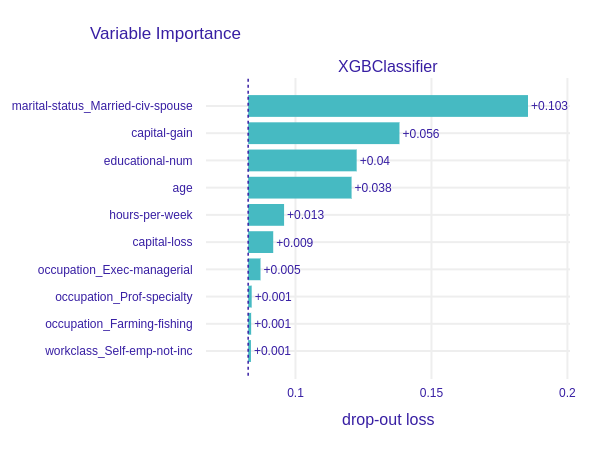

As we can there is not `gender` variable in most important features.

I've then computed fairness metrics for this model for variable `gender` where `male` class was the priviledged group.

```
Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'male'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
             TPR       ACC       PPV       FPR       STP
female  0.865449  1.122449  1.035132  0.208955  0.305677
```



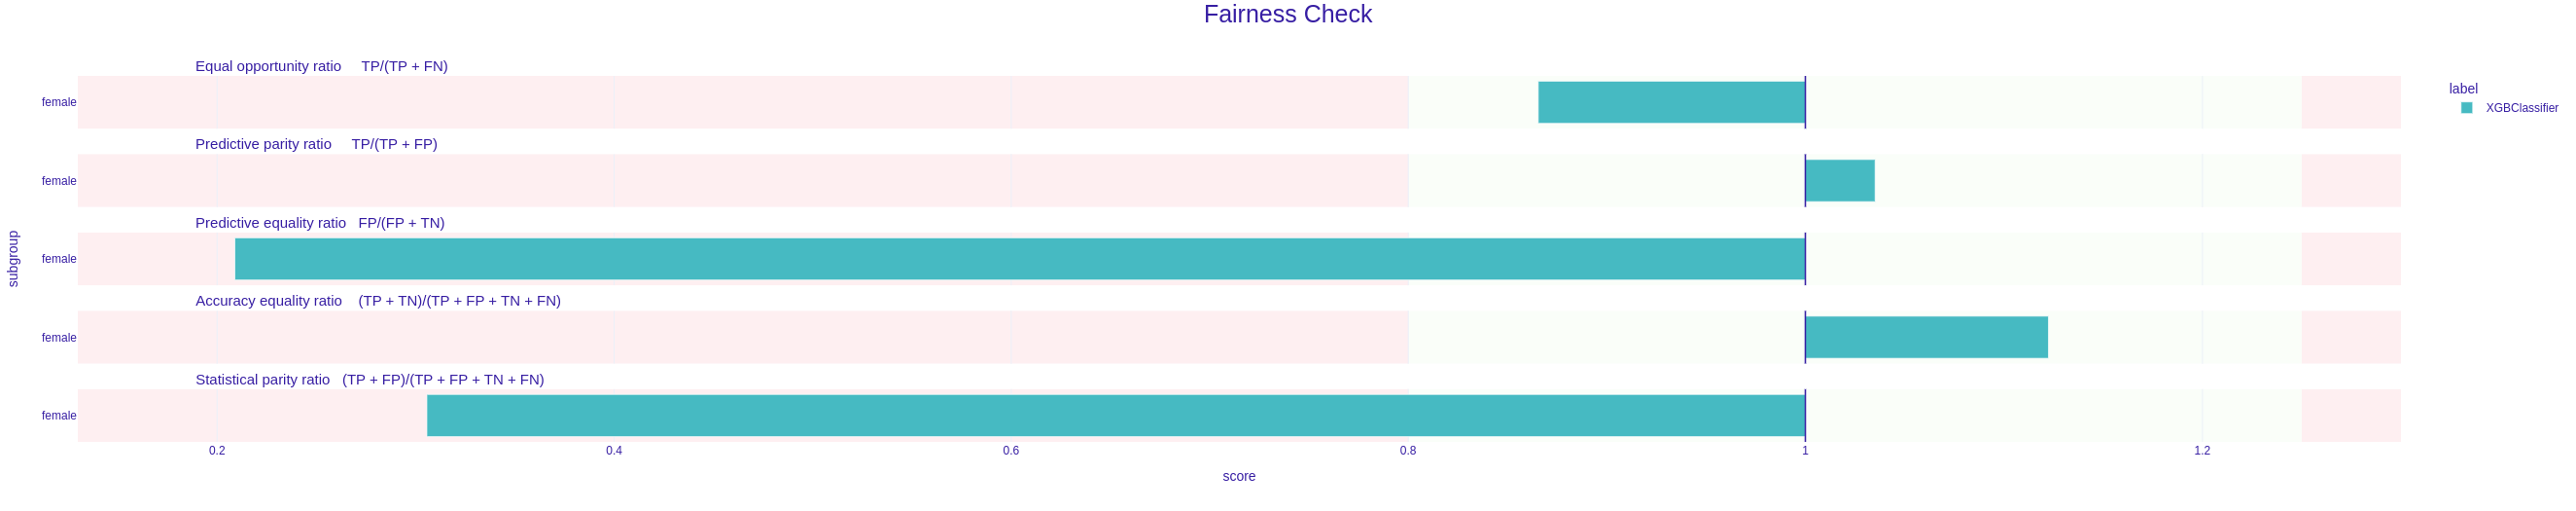

As we can see, this model is not the best in case of fairness. In order to chceck if this would change after eliminating `gender` feature, I've trained another model without this feature (withg the same parameters as the previous one).



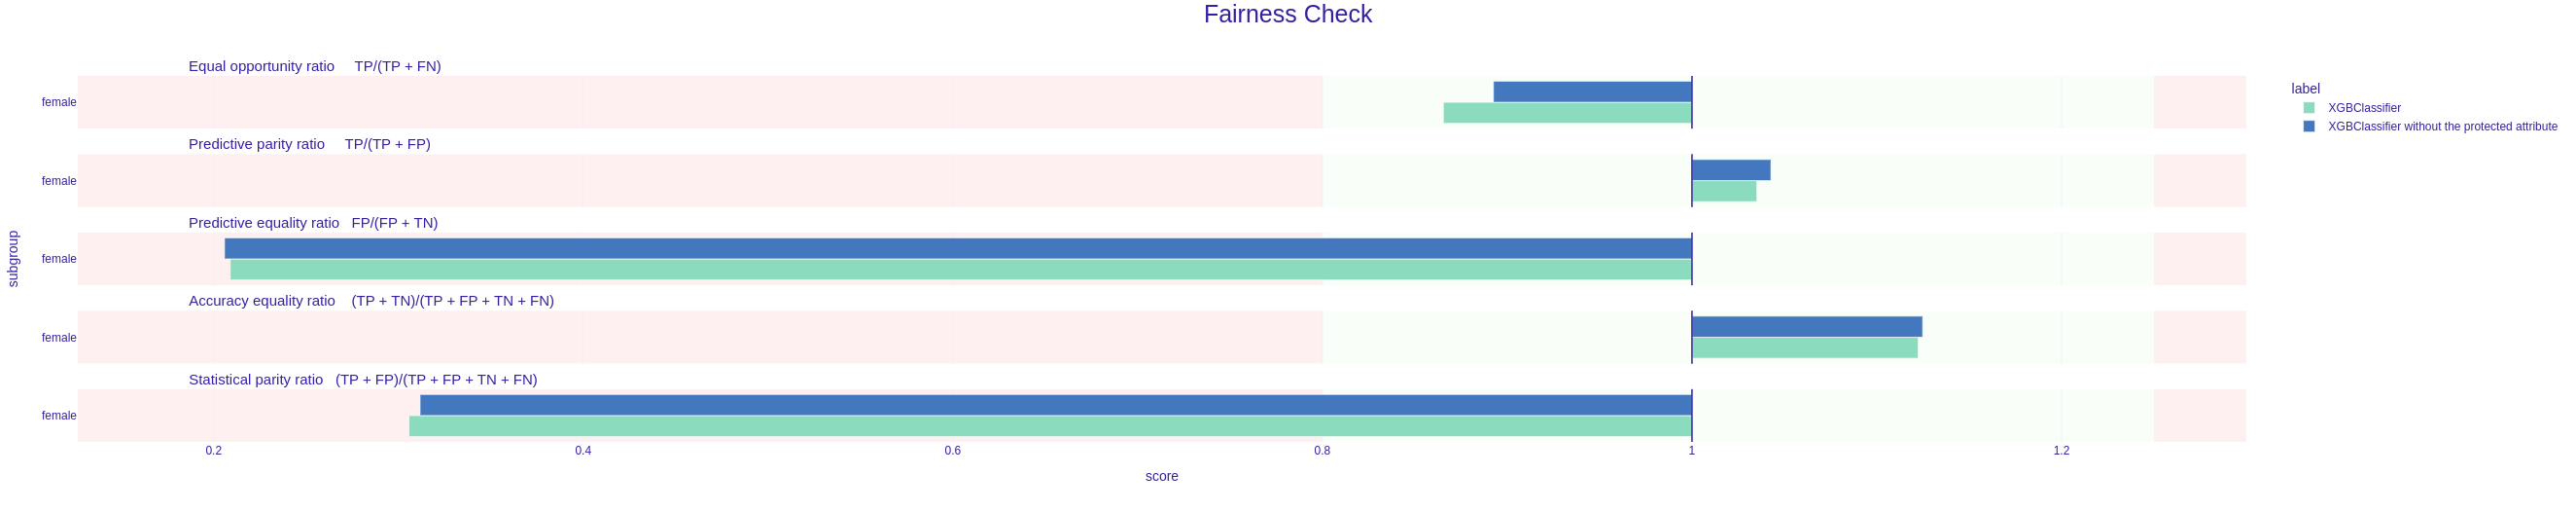

But as we can see on the plot above it didn't really helped with fairness. So the next step was plaing with some mitiogation bias -- I've used three methods available in the `dalex` package: resample mitigation, reweight mitigation and ROC pivot mitigation. 

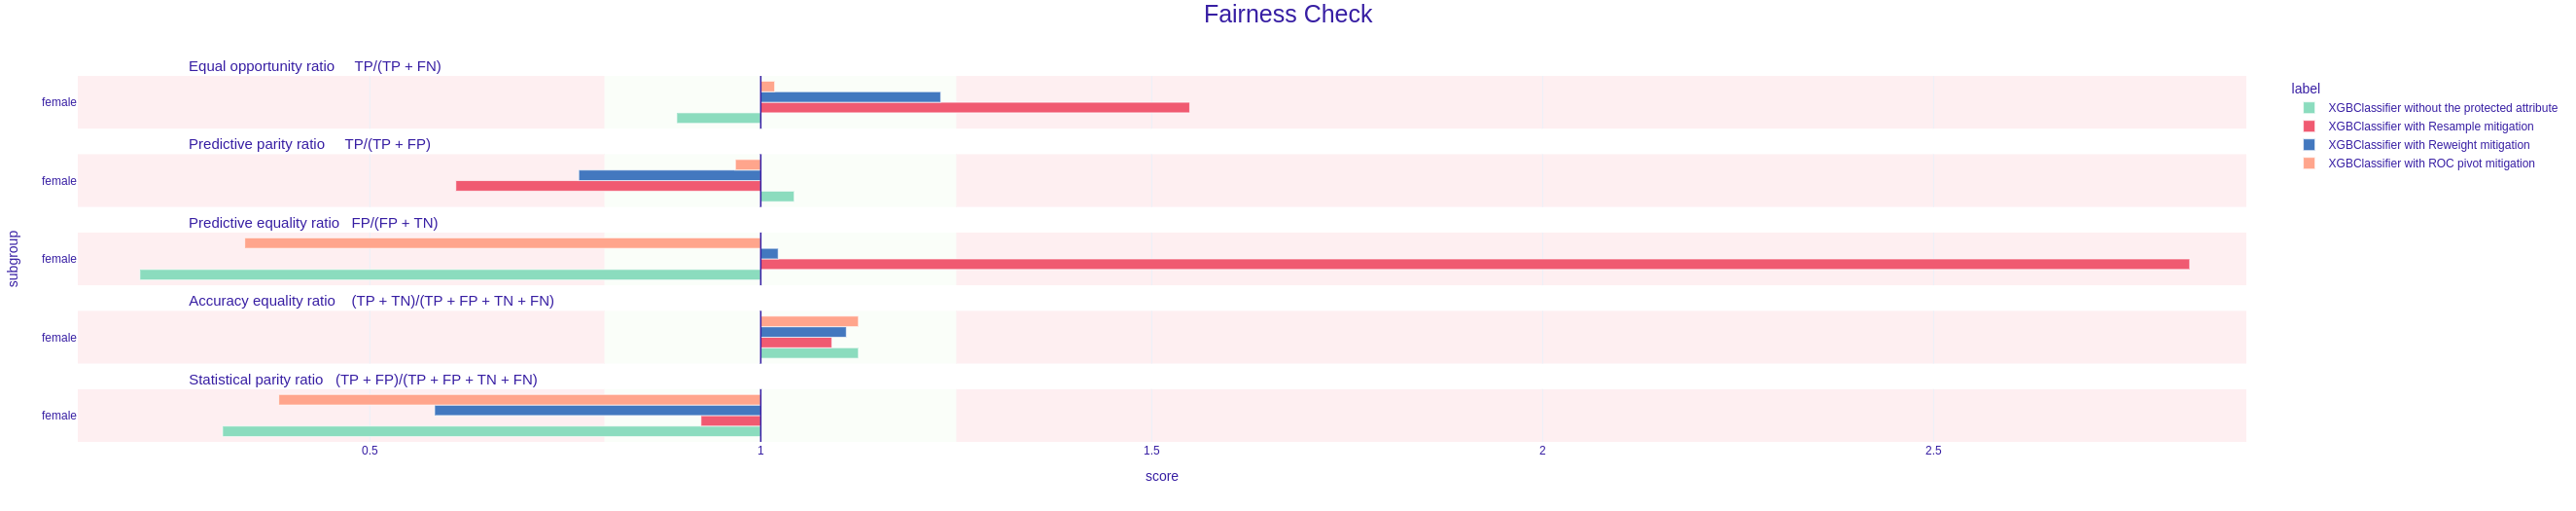

As we can see the results differ with respect to the mitigation method and we should choose which metric is the most important for us to optimize it with the right mitigation bias method.

The best in case of number of metrics that were fair was reweight mitigation, because only in one the metrics (STP) bias was detected. 
```

========== XGBClassifier without the protected attribute ==========
Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'male'. Parameter 'epsilon' was set to 0.66 and therefore metrics should be within (0.66, 1.515)
             TPR      ACC       PPV       FPR       STP
female  0.892562  1.12485  1.042714  0.205882  0.311688

========== XGBClassifier with Resample mitigation ==========
Bias detected in 3 metrics: TPR, PPV, FPR

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'male'. Parameter 'epsilon' was set to 0.66 and therefore metrics should be within (0.66, 1.515)
             TPR       ACC       PPV       FPR       STP
female  1.548583  1.090799  0.609977  2.827586  0.923529

========== XGBClassifier with Reweight mitigation ==========
Bias detected in 1 metric: STP

Conclusion: your model cannot be called fair because 1 criterion exceeded acceptable limits set by epsilon.
It does not mean that your model is unfair but it cannot be automatically approved based on these metrics.

Ratios of metrics, based on 'male'. Parameter 'epsilon' was set to 0.66 and therefore metrics should be within (0.66, 1.515)
             TPR       ACC       PPV       FPR       STP
female  1.230072  1.109375  0.767221  1.022222  0.582915 

========== XGBClassifier with ROC pivot mitigation ==========
Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'male'. Parameter 'epsilon' was set to 0.66 and therefore metrics should be within (0.66, 1.515)
             TPR      ACC       PPV   FPR       STP
female  1.017762  1.12485  0.967548  0.34  0.383495
```

In the case of performance

| |recall	|precision	|f1	|accuracy|	auc|
|----|----|----|----|----|---|
|XGBClassifier without the protected attribute	|0.594953	|0.800345|	0.682532|	0.867540|	0.921059|
|XGBClassifier with Resample mitigation	|0.535500	|0.772840	|0.632643	|0.851162|	0.896824|
|XGBClassifier with Reweight mitigation|	0.571429|	0.797612|	0.665836|	0.862729|	0.916052|
|XGBClassifier with ROC pivot mitigation|	0.565013|	0.827694|	0.671581|	0.867745|	0.921109|
|XGBClassifier|	0.589820|	0.800813|	0.679310|	0.866721|	0.921453|


From the table abowe we can see that improving fairness hadn't much influence on the models' performance. This may attest that caring about fair models is not detrimental from bussiness perspecive but is beneficial for social good. 

I don't see any correlation of fairness metrics with model performance.

The last thing I've checked was explaining the model with reweight mitigation (as it was the best in fairness metrics).




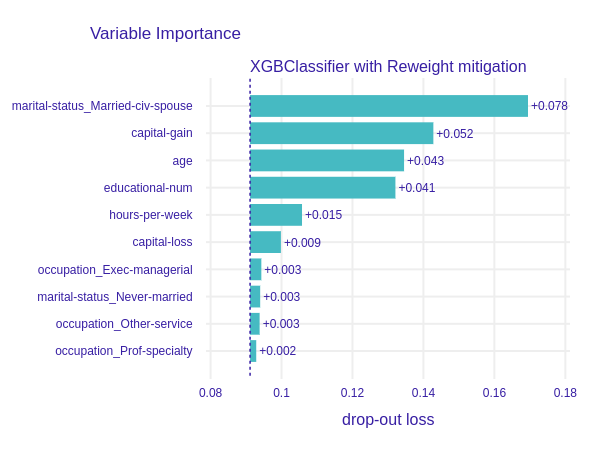

The features are not very different from the features from the first model.

# Appendix

## Setup

In [ ]:
!pip install dalex >/dev/null 2>&1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import classification_report
import dalex as dx
from dalex.fairness import resample, reweight, roc_pivot
from copy import copy

In [ ]:
from google.colab import files
files.upload()
print(' ')

Saving adult_income.zip to adult_income.zip
 


In [ ]:
! unzip adult_income.zip -d data

Archive:  adult_income.zip
  inflating: data/adult.csv          


## Data preprocessing

In [ ]:
df = pd.read_csv('/content/data/adult.csv')

In [ ]:
y = df['income'].replace(['<=50K', '>50K'],
                        [0, 1])
df = df.drop(['income'], axis=1)

In [ ]:
def get_one_hot_columns(df):
  one_hot_columns = []
  for column in df.columns:
    if df[column].dtype == 'object':
      one_hot_columns.append(column)
  return one_hot_columns

df = pd.get_dummies(df, columns=get_one_hot_columns(df), drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y)

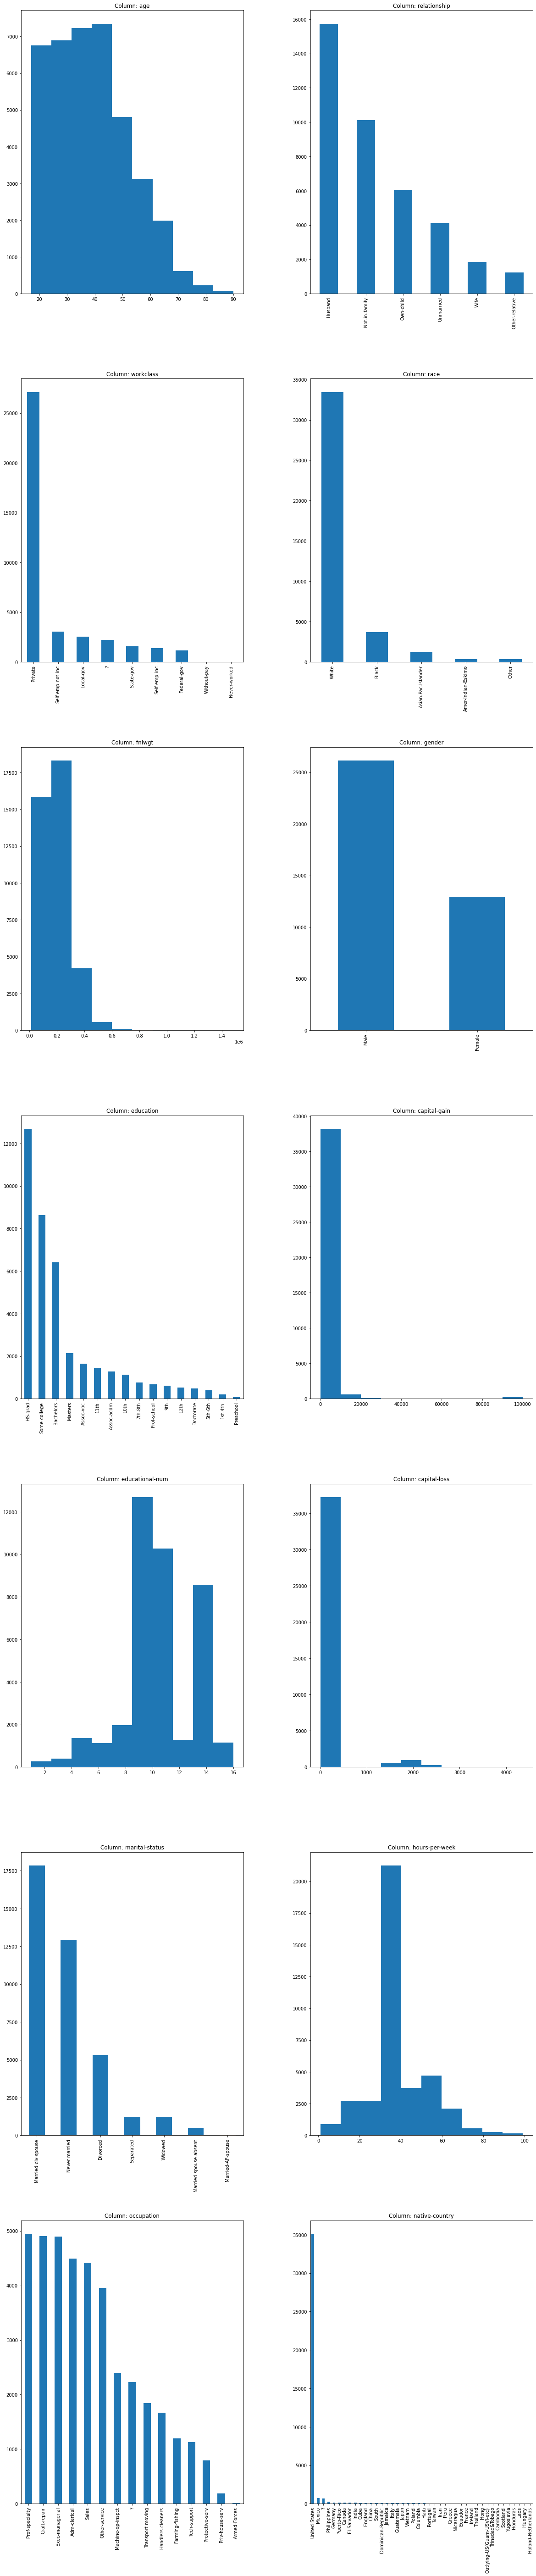

In [ ]:
X_plot = X_train.copy()

fig, ax = plt.subplots(len(X_plot.columns)//2, 2, figsize=(20, 100))

m=0
for i in range(2):
    for j in range(len(X_plot.columns)//2):
        col = X_plot.columns[m]
        try:      
            X_plot[col] = pd.to_numeric(X_plot[col]) 
            X_plot.hist(column=col, ax=ax[j, i], grid=False)
            ax[j, i].set_title(f'Column: {col}') 
        except ValueError:
            X_plot[col].value_counts().plot(kind='bar', ax=ax[j, i])
            ax[j, i].set_title(f'Column: {col}') 
        m += 1

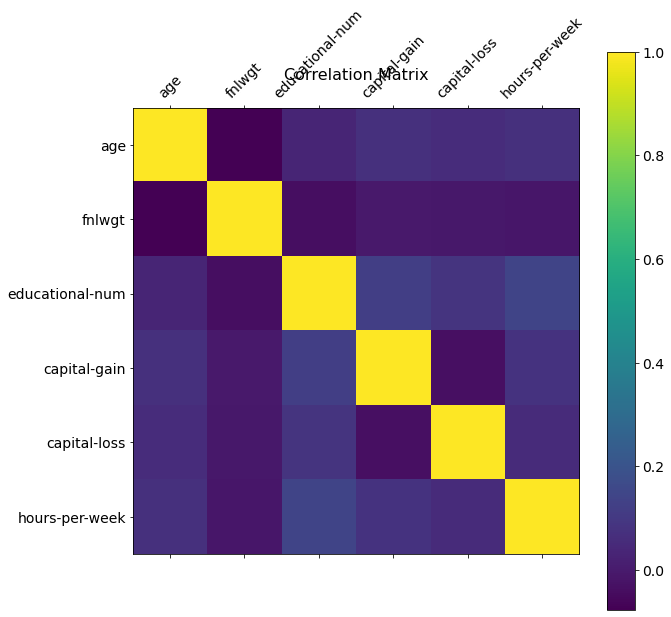

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(X_train.corr(), fignum=f.number)
plt.xticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Model

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=50, 
    max_depth=5, 
    use_label_encoder=False, 
    eval_metric="logloss",
    enable_categorical=False,
    tree_method="hist"
)
     
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      7431
           1       0.80      0.59      0.68      2338

    accuracy                           0.87      9769
   macro avg       0.84      0.77      0.80      9769
weighted avg       0.86      0.87      0.86      9769



In [ ]:
def pf_xgboost_classifier_categorical(model, df):
    df.loc[:, df.dtypes == 'object'] =\
        df.select_dtypes(['object'])\
        .apply(lambda x: x.astype('category'))
    return model.predict_proba(df)[:, 1]

explainer = dx.Explainer(xgb_model, X_test, y_test, predict_function=pf_xgboost_classifier_categorical)

Preparation of a new explainer is initiated

  -> data              : 9769 rows 100 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 9769 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function pf_xgboost_classifier_categorical at 0x7f210df5a9d0> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00518, mean = 0.241, max = 0.991
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.93, mean = -0.0012, max = 0.993
  -> model_info        : package xgboost

A new explainer has been created!


In [ ]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
XGBClassifier,0.58982,0.800813,0.67931,0.866721,0.921453


In [ ]:
pvi = explainer.model_parts(random_state=0)

In [ ]:
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)

## Fairness metrics

In [ ]:
protected_variable = X_test.gender_Male.apply(lambda x: "male" if x else "female")
privileged_group = "male"

fobject = explainer.model_fairness(
    protected=protected_variable,
    privileged=privileged_group
)

In [ ]:
fobject.fairness_check()

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'male'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
             TPR       ACC       PPV       FPR       STP
female  0.865449  1.122449  1.035132  0.208955  0.305677


In [ ]:
fobject.plot()

## Model without protected attribute

In [ ]:
X_train_without_prot, X_test_without_prot = X_train.drop("gender_Male", axis=1), X_test.drop("gender_Male", axis=1)

model_without_prot = xgb.XGBClassifier(
    n_estimators=50, 
    max_depth=5, 
    use_label_encoder=False, 
    eval_metric="logloss",
    enable_categorical=True,
    tree_method="hist"
)

model_without_prot.fit(X_train_without_prot, y_train)

explainer_without_prot = dx.Explainer(
    model_without_prot, 
    X_test_without_prot, 
    y_test,
    predict_function=pf_xgboost_classifier_categorical,
    label="XGBClassifier without the protected attribute",
    verbose=False
)

fobject_without_prot = explainer_without_prot.model_fairness(protected_variable, privileged_group)

In [ ]:
fobject.plot(fobject_without_prot, show=False)

## Bias mitigation


In [ ]:
protected_variable_train = X_train.gender_Male.apply(lambda x: "male" if x else "female")

# resample
indices_resample = resample(
    protected_variable_train, 
    y_train, 
    type='preferential', # uniform
    probs=model_without_prot.predict_proba(X_train_without_prot)[:, 1], # requires probabilities
    verbose=False
)
model_resample = copy(model_without_prot)
model_resample.fit(X_train_without_prot.iloc[indices_resample, :], y_train.iloc[indices_resample])
explainer_resample = dx.Explainer(
    model_resample, 
    X_test_without_prot, 
    y_test, 
    label='XGBClassifier with Resample mitigation',
    verbose=False
)
fobject_resample = explainer_resample.model_fairness(
    protected_variable, 
    privileged_group
)

# reweight
sample_weight = reweight(
    protected_variable_train, 
    y_train, 
    verbose=True
)
model_reweight = copy(model_without_prot)
model_reweight.fit(X_train_without_prot, y_train, sample_weight=sample_weight)
explainer_reweight = dx.Explainer(
    model_reweight, 
    X_test_without_prot, 
    y_test, 
    label='XGBClassifier with Reweight mitigation',
    verbose=False
)
fobject_reweight = explainer_reweight.model_fairness(
    protected_variable, 
    privileged_group
)

# roc_pivot
explainer_roc_pivot = roc_pivot(
    copy(explainer_without_prot), 
    protected_variable, 
    privileged_group,
    verbose=False
)
explainer_roc_pivot.label = 'XGBClassifier with ROC pivot mitigation'
fobject_roc_pivot = explainer_roc_pivot.model_fairness(
    protected_variable, 
    privileged_group
)

Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
protected Series will be converted to np.ndarray
protected array is not string type, converting to string 


In [ ]:
fobject_without_prot.plot([fobject_resample, fobject_reweight, fobject_roc_pivot], show=False)

In [ ]:
for fobj in [fobject_without_prot, fobject_resample, fobject_reweight, fobject_roc_pivot]:
    print("\n========== " + fobj.label + " ==========")
    fobj.fairness_check(epsilon=0.66)


========== XGBClassifier without the protected attribute ==========
Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'male'. Parameter 'epsilon' was set to 0.66 and therefore metrics should be within (0.66, 1.515)
             TPR      ACC       PPV       FPR       STP
female  0.892562  1.12485  1.042714  0.205882  0.311688

========== XGBClassifier with Resample mitigation ==========
Bias detected in 3 metrics: TPR, PPV, FPR

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'male'. Parameter 'epsilon' was set to 0.66 and therefore metrics should be within (0.66, 1.515)
             TPR       ACC       PPV       FPR       STP
female  1.548583  1.090799  0.609977  2.827586  0.923529

========== XGBClassifier with Reweight mitigation ==========
Bias detected in 1 metric: STP

Conclu

## Performance

In [ ]:
pd.concat([
    explainer_without_prot.model_performance().result, 
    explainer_resample.model_performance().result,
    explainer_reweight.model_performance().result,
    explainer_roc_pivot.model_performance().result,
    explainer.model_performance().result
], axis=0)

,recall,precision,f1,accuracy,auc
XGBClassifier without the protected attribute,0.594953,0.800345,0.682532,0.867540,0.921059
XGBClassifier with Resample mitigation,0.535500,0.772840,0.632643,0.851162,0.896824
XGBClassifier with Reweight mitigation,0.571429,0.797612,0.665836,0.862729,0.916052
XGBClassifier with ROC pivot mitigation,0.565013,0.827694,0.671581,0.867745,0.921109
XGBClassifier,0.589820,0.800813,0.679310,0.866721,0.921453


In [ ]:
pvi = explainer_reweight.model_parts(random_state=0)
pvi.plot(show=False).update_layout(autosize=False, width=600, height=450)